# TP réseaux de neurones

Diane Lingrand (diane.lingrand@univ-cotedazur)

Polytech SI4 - CVML - 2020-21

## imports nécessaires pour la suite

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
import copy

In [3]:
# reading the dataset
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()


nbClasses = 10 # 10 digits from 0 to 9
# flatten the images...
xTrain = x_train.reshape(60000, 784)
xTest = x_test.reshape(10000, 784)

# ... and normalize the data (grey levels are integers from 0 to 255)
xTrain = xTrain.astype('float32')/255
xTest = xTest.astype('float32')/255

# original labels corresponds to digits. We transform the labels to categorical labels.
yTrain = tensorflow.keras.utils.to_categorical(y_train, nbClasses)
yTest = tensorflow.keras.utils.to_categorical(y_test, nbClasses)


In [ ]:
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)
print("xTrain shape : ",xTrain.shape)
print("xTest shape : ",xTest.shape)
print('shape of yTrain :', yTrain.shape)

print(type(y_train))
print(yTrain[0])

In [ ]:
t1=np.random.rand(15,6)
t3=np.array([1,4,3,5,8,3,3,9,7,0,2,3,4,5,4])
t2=t1[t3==4,:]
print(t1)
print('\n')
print(t2)

In [4]:
# case of binary classification

# you can change the classes
class1 = 4
class2 = 8
nameClass1 = '4'
nameClass2 = '8'

## TRAIN
#class 1: positives
x_train1 = xTrain[y_train==class1,:]
#class 2: negatives
x_train2 = xTrain[y_train==class2,:]
# merging the 2 classes and shuffle
x_trainBinaire = np.append(x_train1,x_train2,axis=0)
y_trainBinaire = np.append(np.full(len(x_train1),0), np.full(len(x_train2),1))
(x_trainBinaire,y_trainBinaire) = shuffle(x_trainBinaire,y_trainBinaire,random_state=0)
y_trainBinaire = tensorflow.keras.utils.to_categorical(y_trainBinaire, 2)

## TEST
#class 1: positives
x_test1 = xTest[y_test==class1,:]
#class 2: negatives
x_test2 = xTest[y_test==class2,:]
# merging the 2 classes and shuffle
x_testBinaire = np.append(x_test1,x_test2,axis=0)
y_testBinaire = np.append(np.full(len(x_test1),0), np.full(len(x_test2),1))
(x_testBinaire,y_testBinaire) = shuffle(x_testBinaire,y_testBinaire,random_state=0)
y_testBinaire = tensorflow.keras.utils.to_categorical(y_testBinaire, 2)


In [ ]:
print(y_trainBinaire)
xTrain=xTrain_copy
yTrain=yTrain_copy

# 1. Un premier MLP

In [ ]:
nbClasses=2
#Let's build a simple neural network using the keras sequential method
model = Sequential()
#topology: input as the size of data, one hidden layer with 4 neurons and usual sigmoid activation
model.add(Dense(4, input_dim=784, activation='sigmoid'))
#model.add(Dense(4, input_dim=784, activation='sigmoid'))
#softmax for the output using as many neurons as classes (2 in this case)
model.add(Dense(nbClasses, activation='softmax'))


In [ ]:
model.summary()

In [ ]:
#we need to define the loss function for the training, the optimisation method (RMSprop) and the accuracy as a metric
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

#now, let's train for real the network: only 20 epochs and batch size of 128 (so that an epoch contains 60000/128 iterations)
model.fit(x_trainBinaire, y_trainBinaire, epochs=10, batch_size=128)



Que vaut le score F1?

In [ ]:
#is it good? we know the truth: y_testBinaire and we will compare to the output of the network

score = model.evaluate(x_testBinaire,y_testBinaire)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score
pred_testBinaire = np.argmax(model.predict(x_testBinaire),axis=1)
print(pred_testBinaire.shape, y_testBinaire.shape)
print("F1 score: ", f1_score(pred_testBinaire,np.argmax(y_testBinaire,axis=1)))

# 2. Mêmes questions avec les 10 classes


In [5]:
nbClasses=10 
#Let's build a simple neural network using the keras sequential method
model = Sequential()
#topology: input as the size of data, one hidden layer with 20 neurons and usual sigmoid activation
model.add(Dense(20, input_dim=784, activation='softmax'))
#model.add(Dense(20, input_dim=784, activation='sigmoid'))

#softmax for the output using as many neurons as classes (10 in this case)
model.add(Dense(nbClasses, activation='softmax'))
#model.summary()

In [6]:
#we need to define the loss function for the training, the optimisation method (RMSprop) and the accuracy as a metric
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

#now, let's train for real the network: only 20 epochs and batch size of 128 (so that an epoch contains 60000/128 iterations)
model.fit(xTrain, yTrain, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 1s 13us/sample - loss: 1.7977 - accuracy: 0.6909
Epoch 2/5
60000/60000 [==============================] - 1s 11us/sample - loss: 1.2368 - accuracy: 0.7548
Epoch 3/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.8813 - accuracy: 0.7632
Epoch 4/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.6775 - accuracy: 0.7920
Epoch 5/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.5663 - accuracy: 0.8159


In [7]:
#is it good? we know the truth: y_testBinaire and we will compare to the output of the network

score = model.evaluate(xTest,yTest)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

pred_test = np.argmax(model.predict(xTest),axis=1)
print(pred_test.shape,np.argmax(yTest,axis=1).shape)
print("F1 score: ", f1_score(pred_test,np.argmax(yTest,axis=1), average=None))
print("F1 score micro: ", f1_score(pred_test,np.argmax(yTest,axis=1), average='micro'))
print("F1 score macro: ", f1_score(pred_test,np.argmax(yTest,axis=1), average='macro'))

print('confusion matrix\n',confusion_matrix(np.argmax(yTest,axis=1), pred_test))



10000/10000 [==============================] - 0s 22us/sample - loss: 0.5239 - accuracy: 0.8241
accuracy: 82.41%
(10000,) (10000,)
F1 score:  [0.96115538 0.98284206 0.91087169 0.89975787 0.69202088 0.64355062
 0.93911249 0.92381871 0.76280323 0.3056    ]
F1 score micro:  0.8240999999999999
F1 score macro:  0.802153293459155
confusion matrix
 [[ 965    0    0    1    0    4    6    1    3    0]
 [   0 1117    4    2    0    0    4    1    7    0]
 [  11    1  930   20   13    0   15   12   27    3]
 [   3    1   23  929    3   15    1   13   22    0]
 [   2    0    4    0  928    2   14    2    3   27]
 [  12    1    3   62    8  464   17    5  319    1]
 [  16    3    5    2    5   11  910    2    4    0]
 [   2    7   30    6    5    0    1  958    2   17]
 [   7    2   11   19    9   48   12   15  849    2]
 [  10    6    0   14  729    6    0   37   16  191]]


In [ ]:
#confusion matrix


# 3. Essayons de faire mieux ...

## A t-on laissé le temps à l'algorithme de converger ?
Modifiez le nombre d'itérations. Les résultats sont-ils meilleurs ?

## Critère d'arrêt autre que le nombre d'itérations

In this small example, we decided, as a default behavior, to stop after 20 epochs. Of course this value can be changed. Another way to deal with that is to use early stopping criterion. All options are described in the keras documentation. Feel free to experiment all options!

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# we define a callback function that will control if the accuracy 
# on the validation set (a part of train set) is not changing more than 10-4 with a patience of 20 iterations
# If the last accuracy value is not the best one, we still keep the last results
# In this example, we extracted 20% of the train set for the validation set that will be used to monitor the convergence.

ourCallback = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

# let's learn the network again !
# We do not know when the training will stop but no more than 2000 epochs.
model.fit(xTrain, yTrain, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])


A quel 'epoch' l'algorithme s'est-il arrêté ?

21

## Evolution de la convergence

In [ ]:
def plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
import os
import datetime
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.callbacks import EarlyStopping

ourCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
logdir = os.path.join("/home/safwane/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboardCb = tensorflow.keras.callbacks.TensorBoard(logdir) #, histogram_freq=1)

In [ ]:


historyCNN = model.fit(xTrain, yTrain, epochs=2000, batch_size=2048, validation_split=0.2, callbacks=[tensorboardCb,ourCallback])
plot_history(historyCNN)
#%tensorboard --logdir logs

## La topologie du réseau convient ?
Ajoutez des neurones à la couche cachée ou bien augmentez le nombre de couches cachées.
Exemple avec 2 couches cachées de 20 neurones (utilisez les lignes en les modifiant et en enlevant les commentaires):


In [ ]:
#model.add(Dense(20, input_dim=784, activation='sigmoid'))
#model.add(Dense(20, activation='sigmoid'))
#model.add(Dense(nbClasses, activation='softmax'))

Est-ce qu'augmenter le nombre de couches de neurones augmente les performances?

Est-ce qu'augmenter le nombre de neurones par couche augmente les performances?

### Modifiez également l'activation 'sigmoid' par 'relu'. Observez-vous une différence ?

### Essayez les différents 'optimizer' disponibles. Quels sont-ils ? Observez-vous des différences ?

# 4. Modifiez les données en considérant FMNIST (Fashion MNIST)

In [11]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
import matplotlib.pyplot as plt



In [ ]:
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

In [12]:
nbClasses = 10 # 10 digits from 0 to 9
# flatten the images...
xTrain = x_train.reshape(60000, 784)
xTest = x_test.reshape(10000, 784)

# ... and normalize the data (grey levels are integers from 0 to 255)
xTrain = xTrain.astype('float32')/255
xTest = xTest.astype('float32')/255

# original labels corresponds to digits. We transform the labels to categorical labels.
yTrain = tensorflow.keras.utils.to_categorical(y_train, nbClasses)
yTest = tensorflow.keras.utils.to_categorical(y_test, nbClasses)

In [ ]:
t1=[0,1,2,4,5,6]
t2=tensorflow.keras.utils.to_categorical(t1)
print(t2)
print(np.argmax(t2,axis=1))

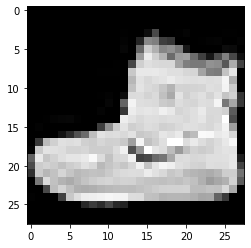

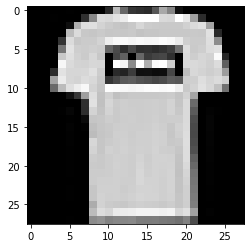

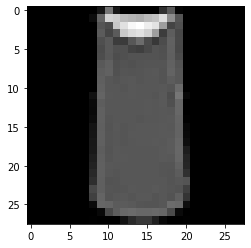

In [18]:
for i in range(3):
    image=x_train[i]
    plt.imshow(image,cmap = 'gray')
    plt.show()

In [13]:
nbClasses=10 
#Let's build a simple neural network using the keras sequential method
model = Sequential()
#topology: input as the size of data, one hidden layer with 20 neurons and usual sigmoid activation
model.add(Dense(20, input_dim=784, activation='softmax'))
#model.add(Dense(20, input_dim=784, activation='sigmoid'))

#softmax for the output using as many neurons as classes (10 in this case)
model.add(Dense(nbClasses, activation='softmax'))
#model.summary()

In [14]:
#we need to define the loss function for the training, the optimisation method (RMSprop) and the accuracy as a metric
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

#now, let's train for real the network: only 20 epochs and batch size of 128 (so that an epoch contains 60000/128 iterations)
model.fit(xTrain, yTrain, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 14us/sample - loss: 1.7763 - accuracy: 0.6490
Epoch 2/5
60000/60000 [==============================] - 1s 11us/sample - loss: 1.2767 - accuracy: 0.7322
Epoch 3/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.9461 - accuracy: 0.7437
Epoch 4/5
60000/60000 [==============================] - 1s 13us/sample - loss: 0.7540 - accuracy: 0.7523
Epoch 5/5
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6547 - accuracy: 0.7569


In [15]:
#is it good? we know the truth: y_testBinaire and we will compare to the output of the network

score = model.evaluate(xTest,yTest)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

pred_test = np.argmax(model.predict(xTest),axis=1)
print(pred_test.shape,np.argmax(yTest,axis=1).shape)
print("F1 score: ", f1_score(pred_test,np.argmax(yTest,axis=1), average=None))
print("F1 score micro: ", f1_score(pred_test,np.argmax(yTest,axis=1), average='micro'))
print("F1 score macro: ", f1_score(pred_test,np.argmax(yTest,axis=1), average='macro'))

print('confusion matrix\n',confusion_matrix(np.argmax(yTest,axis=1), pred_test))



10000/10000 [==============================] - 0s 20us/sample - loss: 0.6492 - accuracy: 0.7496
accuracy: 74.96%
(10000,) (10000,)
F1 score:  [0.792318   0.96273609 0.5289834  0.84795322 0.14079729 0.9394402
 0.08495575 0.92188258 0.95052474 0.94194851]
F1 score micro:  0.7496
F1 score macro:  0.7111539773134727
confusion matrix
 [[887   1  17  45   4   0  31   0  15   0]
 [  2 943  16  30   2   0   5   0   2   0]
 [ 21   2 908  11  34   0  17   0   7   0]
 [ 39   9  18 870  39   3  19   0   3   0]
 [  0   1 868  37  83   0   7   0   4   0]
 [  1   0   0   0   1 923   0  45   2  28]
 [281   2 588  51  14   0  48   0  16   0]
 [  0   0   0   0   0  30   0 950   0  20]
 [  8   1  18   8   2   3   3   6 951   0]
 [  0   0   0   0   0   6   0  60   1 933]]
